In [0]:
# In this project we'll use the CIFAR-10 dataset to classify our images into 10 categories

In [0]:
# This dataset comes inbuilt within Keras. It can also be downloaded from Kaggle. But we'll be using the inbuilt 
# dataset for now. Following is the link to Kaggle dataset:
# https://www.kaggle.com/c/cifar-10/data

In [0]:
# We are using google colab to do this project as colab as GPU availability.

In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# Libraries
import numpy as np
from matplotlib import pyplot

import sys

from sklearn.model_selection import KFold
import tensorflow.keras.utils
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [0]:
# We'll first explore the data. The data has very small images of the orider 32 * 32 pixels, much smaller than an 
# actual camera image. 

170500096/170498071 [==============================] - 6s 0us/step
Train: X = (50000, 32, 32, 3), y = (50000, 1)
Test: X = (10000, 32, 32, 3), y = (10000, 1)


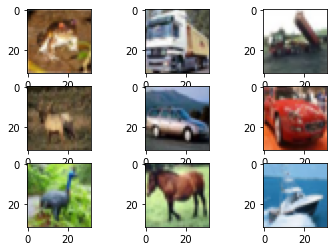

In [7]:
# Load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Summarize the loaded dataset
print('Train: X = %s, y = %s' %(trainX.shape, trainy.shape))
print('Test: X = %s, y = %s' %(testX.shape, testy.shape))

# Plotting first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)

    # plot raw pixel data
    pyplot.imshow(trainX[i])

# Show the figure
pyplot.show()

In [0]:
# Running the above example loads the CIFAR-10 train and test dataset and prints their shape. We can see that there
# are 50,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with
# 32×32 pixels and color, with three channels.

# A plot of the first nine images in the dataset is also created. It is clear that the images are indeed very small
# compared to modern photographs; it can be challenging to see what exactly is represented in some of the images 
# given the extremely low resolution.

In [0]:
# Now we'll build our model. Our model would have dropout regularization, data augmentation and a variable learning
# rate. For a variable learning rate we'll put learning rate as Adam. We'll also do K fold cross validation to
# prevent our model from overfitting. We'll also load the data once again.

# Following is the code for the same

In [0]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [0]:
trainX = trainX.astype('float32')
trainX = trainX / 255.0
testX = testX.astype('float32')
testX = testX / 255.0

------------------------------------------------------------------------
Training for fold 1 ...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
781/781 [==============================] - 25s 32ms/step - loss: 1.7185 - accuracy: 0.4081 - val_loss: 1.2781 - val_accuracy: 0.5460
Epoch 2/100
781/781 [==============================] - 25s 31ms/step - loss: 1.2276 - accuracy: 0.5613 - val_loss: 0.9827 - val_accuracy: 0.6468
Epoch 3/100
781/781 [==============================] - 25s 32ms/step - loss: 1.0604 - accuracy: 0.6254 - val_loss: 1.0230 - val_accuracy: 0.6579
Epoch 4/100
781/781 [==============================] - 25s 32ms/step - loss: 0.9565 - accuracy: 0.6644 - val_loss: 1.0844 - val_accuracy: 0.6504
Epoch 5/100
781/781 [==============================] - 25s 32ms/step - loss: 0.8707 - accuracy: 0.6961 - val_loss: 0.8462 - val_accuracy: 0.7074
Epoch 6/100
781/781 [==============================] - 25s 32ms/step - loss: 0.8089 - accuracy: 0.7200

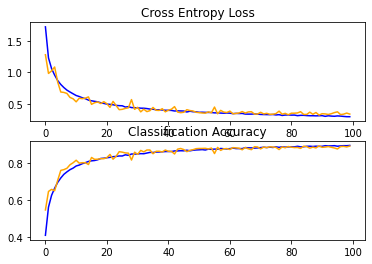

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/100
781/781 [==============================] - 25s 32ms/step - loss: 1.7552 - accuracy: 0.3949 - val_loss: 1.3505 - val_accuracy: 0.5226
Epoch 2/100
781/781 [==============================] - 25s 32ms/step - loss: 1.2581 - accuracy: 0.5482 - val_loss: 1.0896 - val_accuracy: 0.6140
Epoch 3/100
781/781 [==============================] - 25s 31ms/step - loss: 1.0640 - accuracy: 0.6233 - val_loss: 1.1729 - val_accuracy: 0.6050
Epoch 4/100
781/781 [==============================] - 25s 31ms/step - loss: 0.9471 - accuracy: 0.6697 - val_loss: 0.8320 - val_accuracy: 0.7175
Epoch 5/100
781/781 [==============================] - 24s 31ms/step - loss: 0.8721 - accuracy: 0.6964 - val_loss: 0.8530 - val_accuracy: 0.7100
Epoch 6/100
781/781 [==============================] - 24s 31ms/step - loss: 0.8065 - accuracy: 0.7198 - val_loss: 0.7485 - val_accuracy: 0.7408
Epoch 7/100
781/781 [============

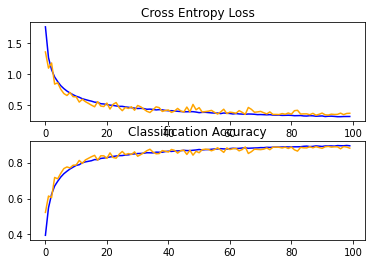

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/100
781/781 [==============================] - 25s 32ms/step - loss: 1.7222 - accuracy: 0.4064 - val_loss: 1.3712 - val_accuracy: 0.5221
Epoch 2/100
781/781 [==============================] - 25s 31ms/step - loss: 1.2091 - accuracy: 0.5693 - val_loss: 0.9926 - val_accuracy: 0.6505
Epoch 3/100
781/781 [==============================] - 25s 31ms/step - loss: 1.0279 - accuracy: 0.6370 - val_loss: 0.8676 - val_accuracy: 0.6953
Epoch 4/100
781/781 [==============================] - 25s 32ms/step - loss: 0.9196 - accuracy: 0.6796 - val_loss: 0.8740 - val_accuracy: 0.7008
Epoch 5/100
781/781 [==============================] - 24s 31ms/step - loss: 0.8418 - accuracy: 0.7090 - val_loss: 0.9982 - val_accuracy: 0.6786
Epoch 6/100
781/781 [==============================] - 25s 32ms/step - loss: 0.7932 - accuracy: 0.7264 - val_loss: 0.6344 - val_accuracy: 0.7816
Epoch 7/100
781/781 [============

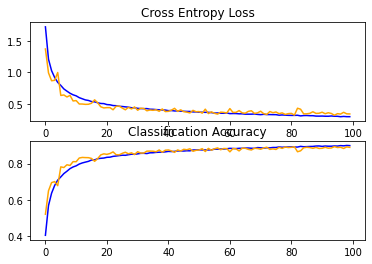

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/100
781/781 [==============================] - 26s 33ms/step - loss: 1.7725 - accuracy: 0.3945 - val_loss: 1.2472 - val_accuracy: 0.5516
Epoch 2/100
781/781 [==============================] - 26s 34ms/step - loss: 1.2508 - accuracy: 0.5537 - val_loss: 1.1056 - val_accuracy: 0.6147
Epoch 3/100
781/781 [==============================] - 26s 33ms/step - loss: 1.0612 - accuracy: 0.6257 - val_loss: 0.9137 - val_accuracy: 0.6802
Epoch 4/100
781/781 [==============================] - 26s 34ms/step - loss: 0.9436 - accuracy: 0.6684 - val_loss: 0.7606 - val_accuracy: 0.7338
Epoch 5/100
781/781 [==============================] - 27s 34ms/step - loss: 0.8675 - accuracy: 0.6987 - val_loss: 0.7969 - val_accuracy: 0.7241
Epoch 6/100
781/781 [==============================] - 26s 34ms/step - loss: 0.8032 - accuracy: 0.7222 - val_loss: 0.7088 - val_accuracy: 0.7560
Epoch 7/100
781/781 [============

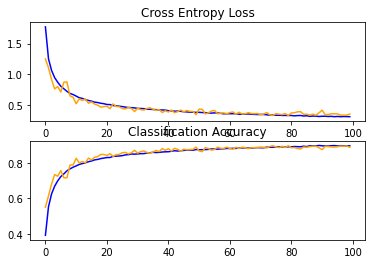

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/100
781/781 [==============================] - 25s 32ms/step - loss: 1.7271 - accuracy: 0.4026 - val_loss: 1.3859 - val_accuracy: 0.5048
Epoch 2/100
781/781 [==============================] - 25s 32ms/step - loss: 1.2193 - accuracy: 0.5631 - val_loss: 1.3271 - val_accuracy: 0.5812
Epoch 3/100
781/781 [==============================] - 25s 31ms/step - loss: 1.0364 - accuracy: 0.6338 - val_loss: 0.9384 - val_accuracy: 0.6708
Epoch 4/100
781/781 [==============================] - 25s 31ms/step - loss: 0.9303 - accuracy: 0.6764 - val_loss: 0.8547 - val_accuracy: 0.7070
Epoch 5/100
781/781 [==============================] - 25s 32ms/step - loss: 0.8503 - accuracy: 0.7041 - val_loss: 0.9303 - val_accuracy: 0.6841
Epoch 6/100
781/781 [==============================] - 25s 31ms/step - loss: 0.7906 - accuracy: 0.7258 - val_loss: 0.8686 - val_accuracy: 0.6995
Epoch 7/100
781/781 [============

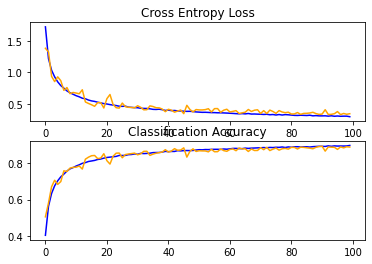

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/100
781/781 [==============================] - 25s 32ms/step - loss: 1.7291 - accuracy: 0.3995 - val_loss: 1.3640 - val_accuracy: 0.5200
Epoch 2/100
781/781 [==============================] - 25s 32ms/step - loss: 1.2356 - accuracy: 0.5588 - val_loss: 1.0395 - val_accuracy: 0.6317
Epoch 3/100
781/781 [==============================] - 25s 32ms/step - loss: 1.0386 - accuracy: 0.6336 - val_loss: 1.0061 - val_accuracy: 0.6576
Epoch 4/100
781/781 [==============================] - 25s 32ms/step - loss: 0.9372 - accuracy: 0.6740 - val_loss: 0.8394 - val_accuracy: 0.7040
Epoch 5/100
781/781 [==============================] - 25s 32ms/step - loss: 0.8549 - accuracy: 0.7031 - val_loss: 0.7524 - val_accuracy: 0.7468
Epoch 6/100
781/781 [==============================] - 25s 32ms/step - loss: 0.7972 - accuracy: 0.7257 - val_loss: 0.7523 - val_accuracy: 0.7432
Epoch 7/100
781/781 [============

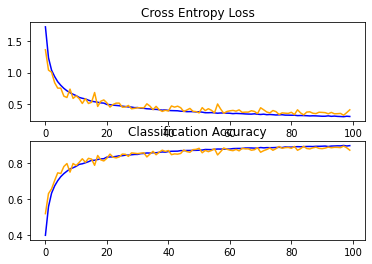

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/100
781/781 [==============================] - 26s 34ms/step - loss: 1.7474 - accuracy: 0.3999 - val_loss: 1.4336 - val_accuracy: 0.4979
Epoch 2/100
781/781 [==============================] - 26s 33ms/step - loss: 1.2338 - accuracy: 0.5590 - val_loss: 1.0864 - val_accuracy: 0.6215
Epoch 3/100
781/781 [==============================] - 26s 33ms/step - loss: 1.0616 - accuracy: 0.6256 - val_loss: 0.9785 - val_accuracy: 0.6677
Epoch 4/100
781/781 [==============================] - 26s 33ms/step - loss: 0.9501 - accuracy: 0.6683 - val_loss: 0.7812 - val_accuracy: 0.7257
Epoch 5/100
781/781 [==============================] - 26s 34ms/step - loss: 0.8692 - accuracy: 0.6961 - val_loss: 0.7559 - val_accuracy: 0.7336
Epoch 6/100
781/781 [==============================] - 26s 34ms/step - loss: 0.8102 - accuracy: 0.7195 - val_loss: 0.8239 - val_accuracy: 0.7235
Epoch 7/100
781/781 [============

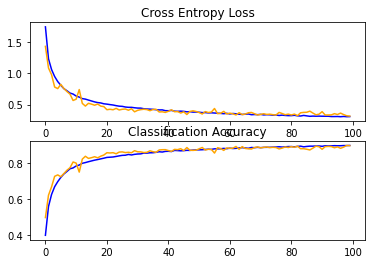

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/100
781/781 [==============================] - 25s 32ms/step - loss: 1.7251 - accuracy: 0.4069 - val_loss: 1.2557 - val_accuracy: 0.5536
Epoch 2/100
781/781 [==============================] - 25s 32ms/step - loss: 1.2095 - accuracy: 0.5658 - val_loss: 1.0574 - val_accuracy: 0.6296
Epoch 3/100
781/781 [==============================] - 25s 32ms/step - loss: 1.0298 - accuracy: 0.6369 - val_loss: 0.9049 - val_accuracy: 0.6881
Epoch 4/100
781/781 [==============================] - 25s 32ms/step - loss: 0.9182 - accuracy: 0.6817 - val_loss: 0.7576 - val_accuracy: 0.7390
Epoch 5/100
781/781 [==============================] - 25s 32ms/step - loss: 0.8465 - accuracy: 0.7077 - val_loss: 0.7084 - val_accuracy: 0.7570
Epoch 6/100
781/781 [==============================] - 25s 32ms/step - loss: 0.7924 - accuracy: 0.7265 - val_loss: 0.7049 - val_accuracy: 0.7626
Epoch 7/100
781/781 [============

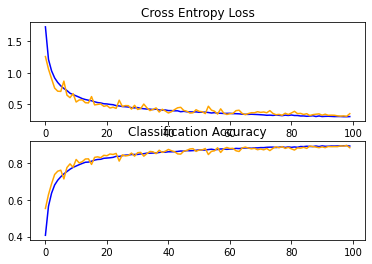

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/100
781/781 [==============================] - 26s 33ms/step - loss: 1.7670 - accuracy: 0.3874 - val_loss: 1.2436 - val_accuracy: 0.5579
Epoch 2/100
781/781 [==============================] - 26s 33ms/step - loss: 1.2613 - accuracy: 0.5474 - val_loss: 1.0678 - val_accuracy: 0.6141
Epoch 3/100
781/781 [==============================] - 26s 33ms/step - loss: 1.0574 - accuracy: 0.6249 - val_loss: 0.9059 - val_accuracy: 0.6771
Epoch 4/100
781/781 [==============================] - 26s 33ms/step - loss: 0.9399 - accuracy: 0.6707 - val_loss: 0.8618 - val_accuracy: 0.7053
Epoch 5/100
781/781 [==============================] - 25s 33ms/step - loss: 0.8617 - accuracy: 0.6988 - val_loss: 0.7796 - val_accuracy: 0.7246
Epoch 6/100
781/781 [==============================] - 25s 33ms/step - loss: 0.7989 - accuracy: 0.7232 - val_loss: 0.7263 - val_accuracy: 0.7491
Epoch 7/100
781/781 [============

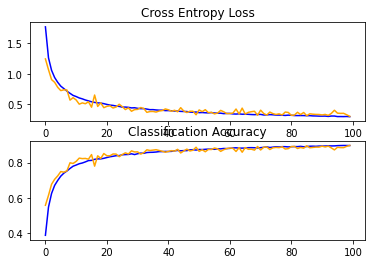

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/100
781/781 [==============================] - 25s 32ms/step - loss: 1.7370 - accuracy: 0.3962 - val_loss: 1.4825 - val_accuracy: 0.4731
Epoch 2/100
781/781 [==============================] - 25s 32ms/step - loss: 1.2446 - accuracy: 0.5526 - val_loss: 1.2508 - val_accuracy: 0.5743
Epoch 3/100
781/781 [==============================] - 25s 32ms/step - loss: 1.0662 - accuracy: 0.6215 - val_loss: 1.0552 - val_accuracy: 0.6344
Epoch 4/100
781/781 [==============================] - 25s 32ms/step - loss: 0.9493 - accuracy: 0.6677 - val_loss: 0.8417 - val_accuracy: 0.7151
Epoch 5/100
781/781 [==============================] - 25s 32ms/step - loss: 0.8639 - accuracy: 0.7015 - val_loss: 0.8223 - val_accuracy: 0.7138
Epoch 6/100
781/781 [==============================] - 25s 32ms/step - loss: 0.8092 - accuracy: 0.7218 - val_loss: 0.7678 - val_accuracy: 0.7415
Epoch 7/100
781/781 [===========

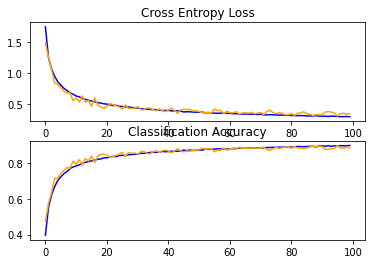

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.19652748107910156 - Accuracy: 93.63333582878113%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.23163385689258575 - Accuracy: 92.10000038146973%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.194549560546875 - Accuracy: 93.46666932106018%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.2083970606327057 - Accuracy: 92.98333525657654%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.1910858005285263 - Accuracy: 93.50000023841858%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.23797208070755005 - Accuracy: 91.96666479110718%
----------------------------------------------------------------------

In [12]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((trainX, testX), axis=0)
targets = np.concatenate((trainY, testY), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits = 10, shuffle = True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))

    # compile model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size = 64)

    # fit model
    steps = int(trainX.shape[0] / 64)
    history = model.fit_generator(it_train, steps_per_epoch = steps, epochs = 100, validation_data = (testX, testY), verbose = 1)    

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')

    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

    pyplot.show()

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

# Save the final model
model.save('final_model.h5')

In [15]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    # return normalized images
    return train_norm, test_norm
 
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # load model
    model = load_model('final_model.h5')
    
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

# entry point, run the test harness 
run_test_harness()

> 88.150


In [0]:
# We are getting a decent enough testing accuracy of 88.15% on our test data. We'll now save this and make 
# predictions on individual images

In [0]:
# Important point

# The number of epochs is not that significant. More important is the the validation and training error. As long as
# it keeps dropping training should continue. For instance, if the validation error starts increasing that might be
# a indication of overfitting. You should set the number of epochs as high as possible and terminate training based
# on the error rates. Just mo be clear, an epoch is one learning cycle where the learner sees the whole training 
# data set. If you have two batches, the learner needs to go through two iterations for one epoch.